In [1]:
#importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC



#reading file
df=pd.read_csv('LungCapData.csv')
df=df.sort_values(by='Age')
df

Unnamed: 0  LungCap  Age  Height Smoke  Gender Caesarean
595         596    1.450    3    45.3    no  female        no
530         531    4.075    3    53.6    no    male       yes
513         514    1.675    3    51.9    no    male        no
113         114    5.875    3    55.9    no    male        no
620         621    3.675    3    54.2    no    male       yes
..          ...      ...  ...     ...   ...     ...       ...
94           95   11.750   19    78.0   yes  female       yes
124         125   12.950   19    79.6    no    male       yes
83           84   11.575   19    78.2    no  female        no
57           58   11.400   19    79.1    no    male        no
705         706   12.425   19    73.6    no  female       yes

[725 rows x 7 columns]

In [2]:
#dropping 'Unnamed: 0' column
df.drop('Unnamed: 0',axis=1,inplace=True)
df

LungCap  Age  Height Smoke  Gender Caesarean
595    1.450    3    45.3    no  female        no
530    4.075    3    53.6    no    male       yes
513    1.675    3    51.9    no    male        no
113    5.875    3    55.9    no    male        no
620    3.675    3    54.2    no    male       yes
..       ...  ...     ...   ...     ...       ...
94    11.750   19    78.0   yes  female       yes
124   12.950   19    79.6    no    male       yes
83    11.575   19    78.2    no  female        no
57    11.400   19    79.1    no    male        no
705   12.425   19    73.6    no  female       yes

[725 rows x 6 columns]

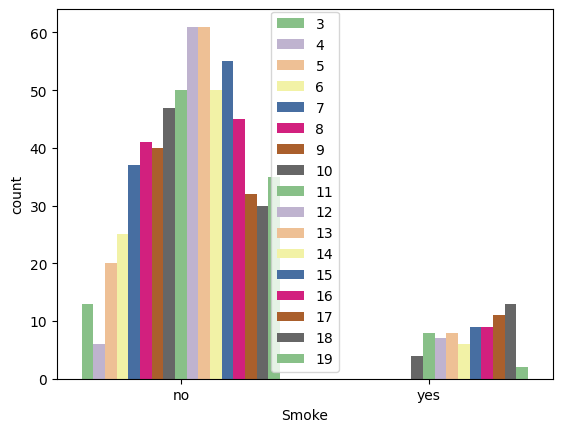

In [4]:
#Count of smokers by age

sns.countplot(x=df['Smoke'],hue=df['Age'],palette='Accent',linewidth=5)
plt.legend(loc='best')
plt.show()

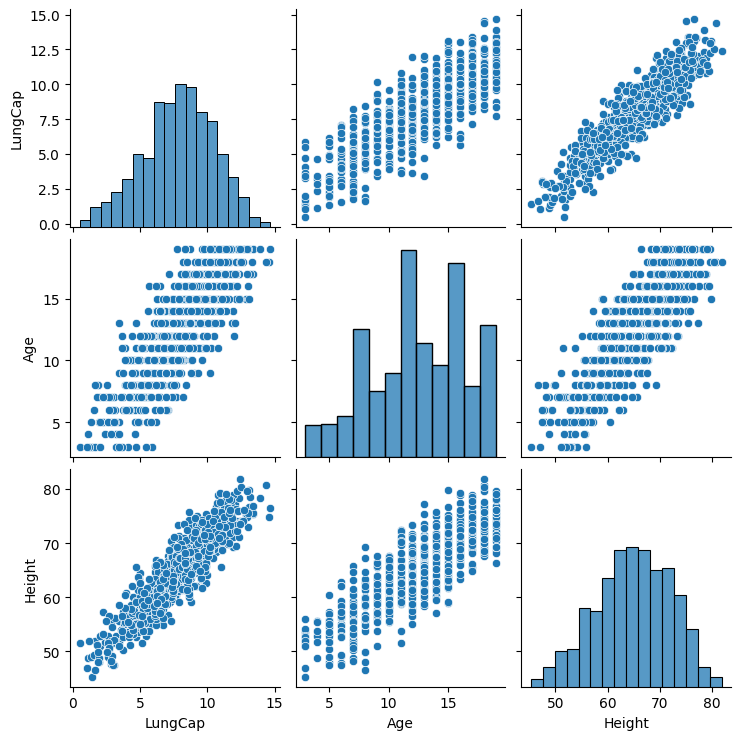

In [5]:
#plotting relationship between numerical columns
sns.pairplot(data=df)
plt.show()

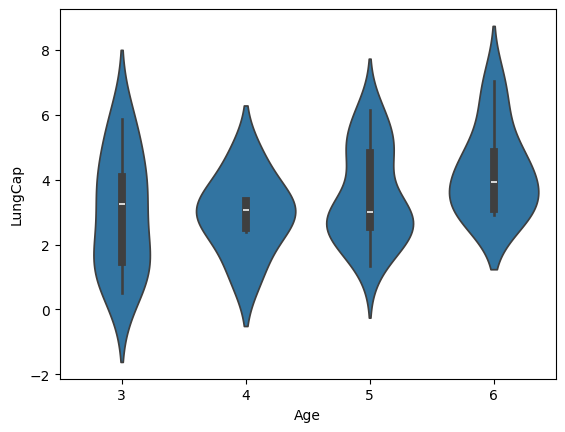

In [6]:
#Relationship between Age & Lungcapacity of children

sns.violinplot(data=df.head(50),x='Age',y='LungCap')
plt.show()

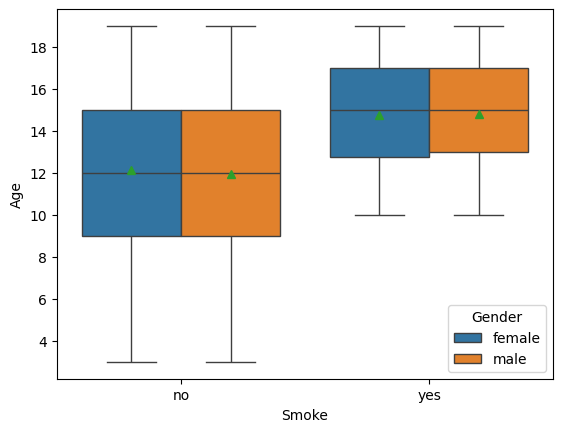

In [7]:
#Age-Smoke graph alongwith gender marking
sns.boxplot(x='Smoke',y='Age',hue='Gender',data=df,showmeans=True)
plt.show()

In [8]:
svm_clf=SVC()

X=df.drop(['Smoke','Gender','Caesarean'],axis=1)
Y=df.loc[:,'Smoke']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)
svm_clf.fit(x_train,y_train)
svm_predicted=svm_clf.predict(x_test)


In [9]:
svm_acc=accuracy_score(svm_predicted,y_test)
print('Accuracy score of svm is:',svm_acc)

Accuracy score of svm is: 0.9036697247706422


In [10]:
lr_clf=LogisticRegression()
lr_clf.fit(x_train,y_train)
lr_pred=lr_clf.predict(x_test)
lr_acc=accuracy_score(lr_pred,y_test)
print('Accuracy score of Logistic Regression:',lr_acc)

Accuracy score of Logistic Regression: 0.9036697247706422
